<a href="https://colab.research.google.com/github/DataEtnos/Estudos-2/blob/main/K_Means_avalia%C3%A7%C3%A3o_de_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%%capture
%pip install kmodes

In [54]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [55]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [56]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-3.678425,7.616447
1,-2.563954,5.330874
2,-2.229021,4.960242
3,-4.634736,6.597246
4,-2.822197,4.428946


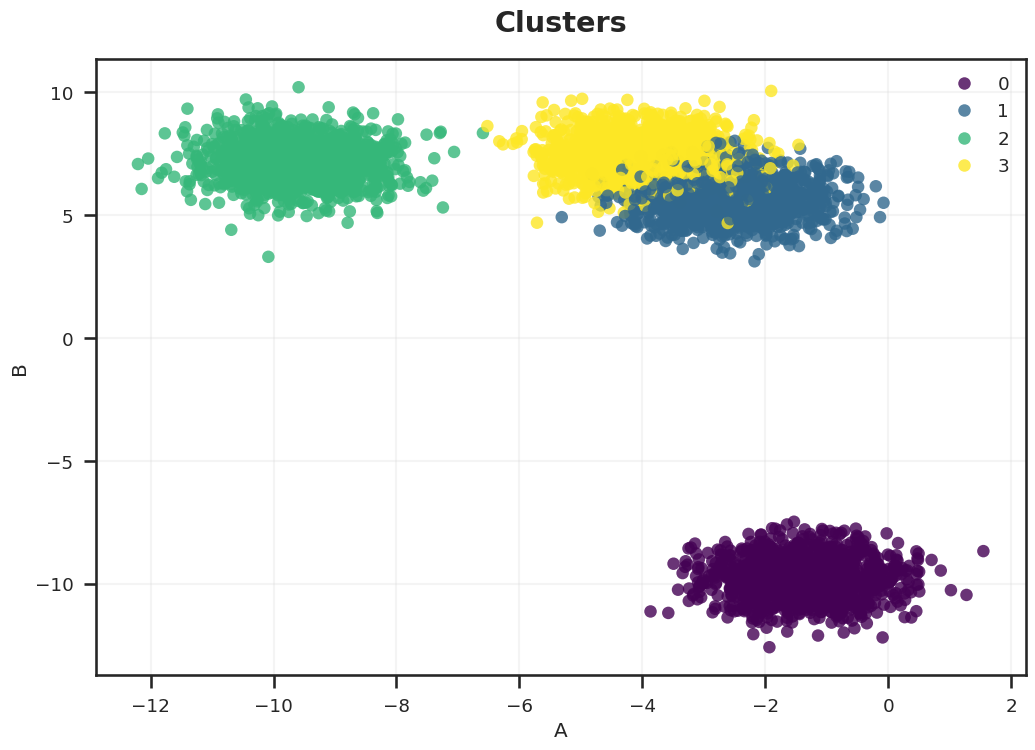

In [57]:
sns.scatterplot(data=df, x='A', y='B', hue = y, **scatter_kwargs)
plt.title('Clusters');


In [58]:
centroides ,  labels , inercia = k_means(df, n_clusters= 4 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
k_means?

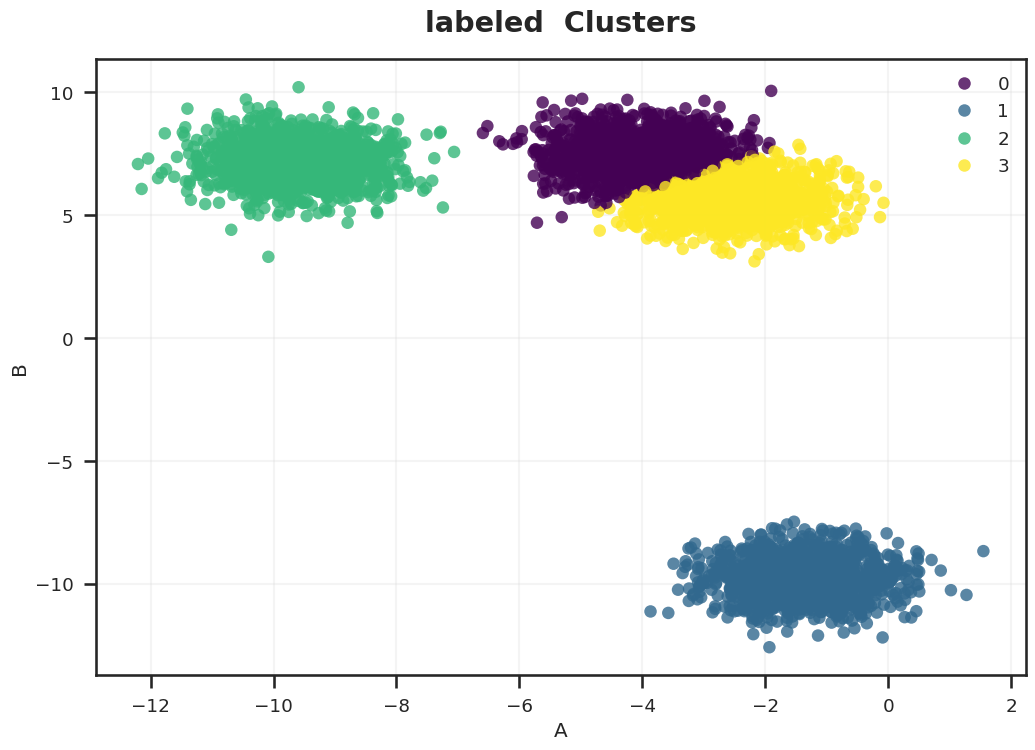

In [60]:
 sns.scatterplot(data = df , x = 'A',y= 'B', hue = labels, **scatter_kwargs)



plt.title('labeled  Clusters')
plt.show()

In [61]:
modelo =  KMeans(  n_clusters= 4 )
modelo.fit(df)


centroides = modelo.cluster_centers_
labels = modelo.labels_
inercia = modelo.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
print(centroides)
print(labels)
print(inercia)

[[-9.60052046  7.16639043]
 [-1.39101706 -9.75091567]
 [-4.06208457  7.4680948 ]
 [-2.5393048   5.60298039]]
[2 3 3 ... 2 3 3]
6095.272244837585


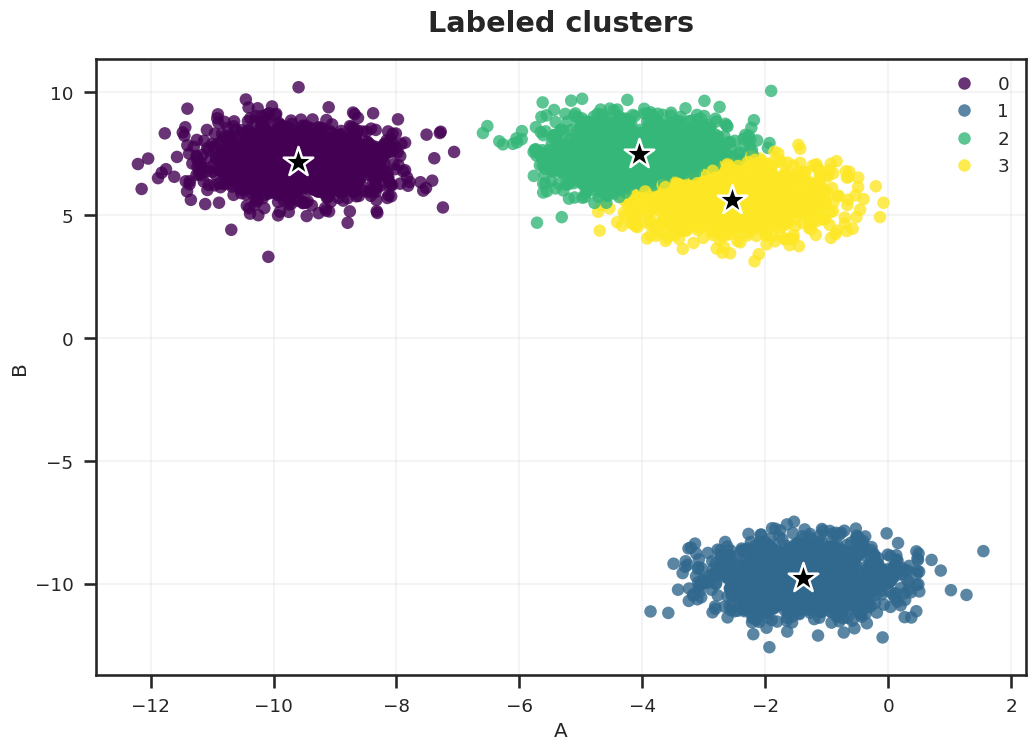

In [63]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

In [64]:
#metricas

print(silhouette_score(df, labels))
print(davies_bouldin_score(df, labels))
print(calinski_harabasz_score(df, labels))

0.646920753991755
0.5201708804917567
83957.23754912979


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

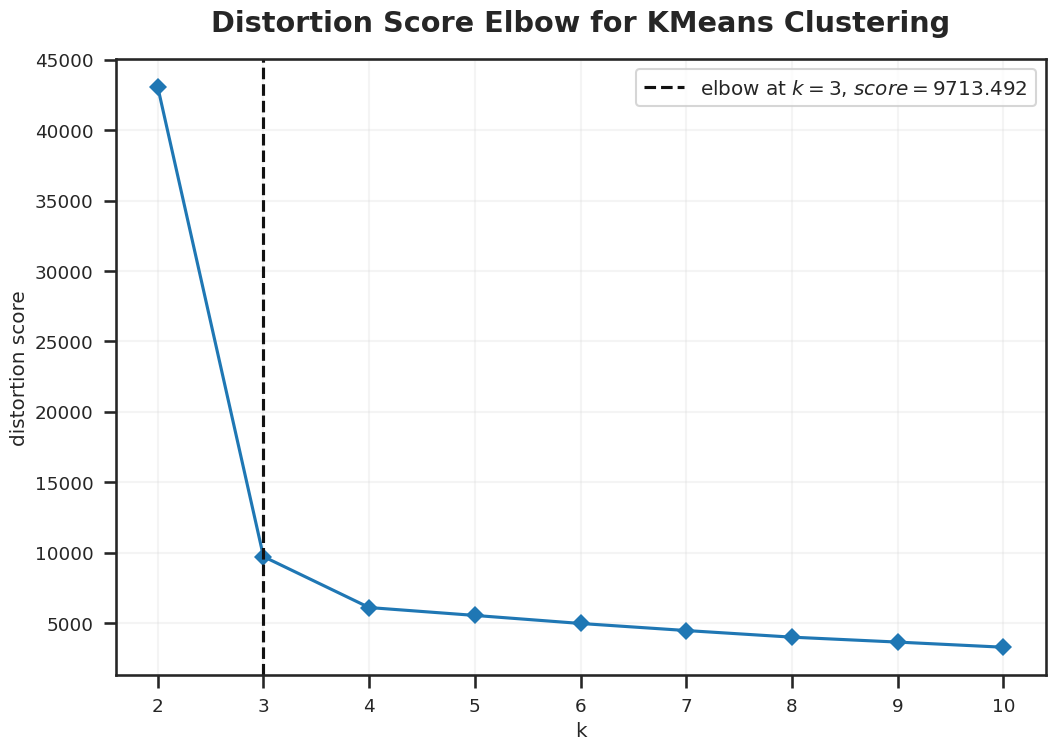

In [65]:
kelbow_visualizer(modelo, df, k=10, timings=False);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

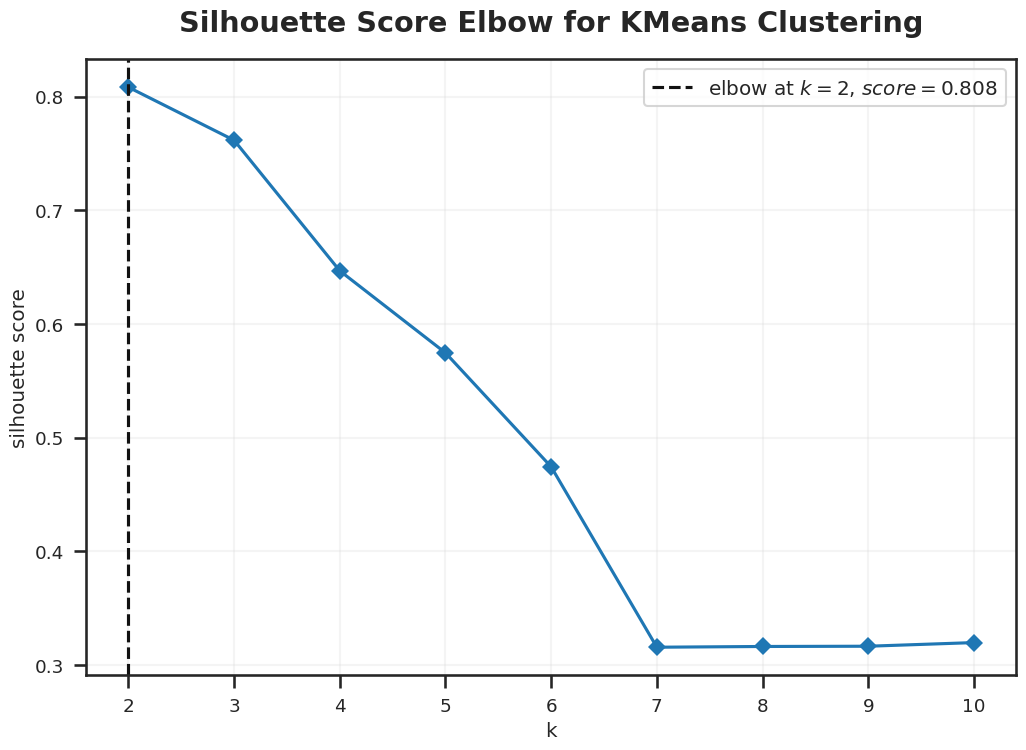

In [66]:
kelbow_visualizer(modelo, df, k=10, timings=False, metric='silhouette');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


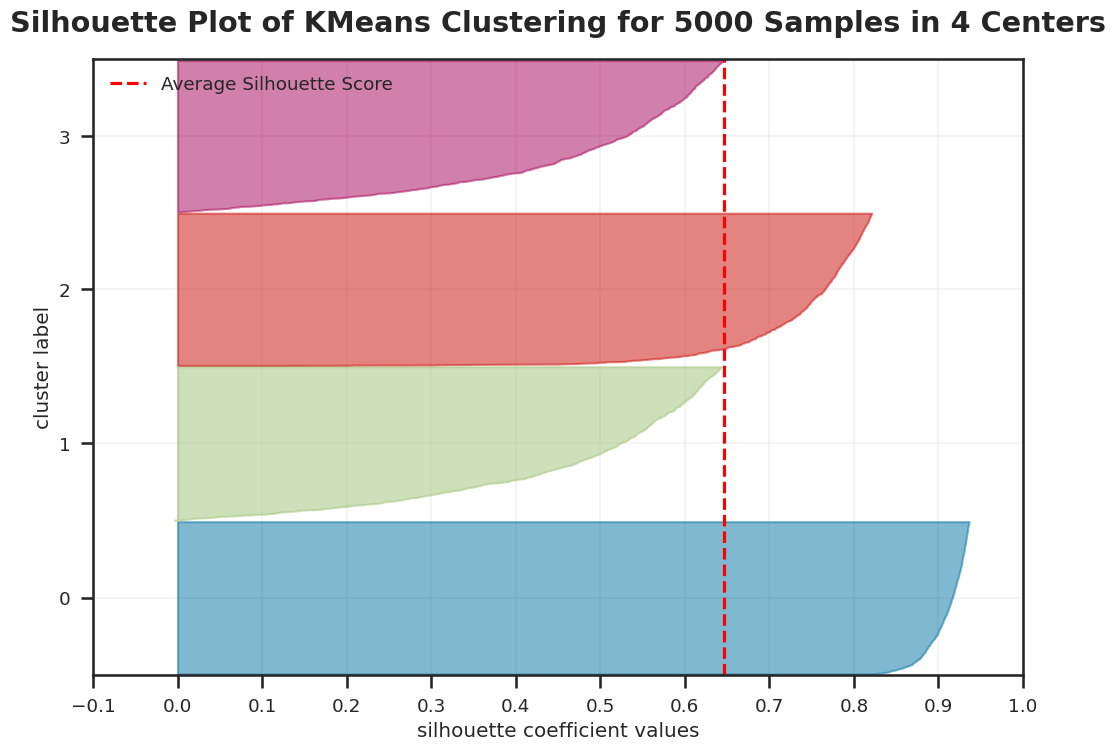

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [67]:
silhouette_visualizer(KMeans(n_clusters=4), df, colors='yellowbrick')

In [68]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[{'k': 2,
  'inertia': 43057.936130933085,
  'silhouette_score': 0.8084328233211638,
  'davies_bouldin_score': 0.2382222739455766,
  'calinski_harabasz_score': 31378.421480661073},
 {'k': 3,
  'inertia': 9713.505890207367,
  'silhouette_score': 0.7617838108366414,
  'davies_bouldin_score': 0.3114530025046822,
  'calinski_harabasz_score': 78110.00824348663},
 {'k': 4,
  'inertia': 6095.272244837585,
  'silhouette_score': 0.646920753991755,
  'davies_bouldin_score': 0.5201708804917567,
  'calinski_harabasz_score': 83957.23754912979},
 {'k': 5,
  'inertia': 5488.074173208257,
  'silhouette_score': 0.5749265287619056,
  'davies_bouldin_score': 0.7256193334833085,
  'calinski_harabasz_score': 70060.55713804091},
 {'k': 6,
  'inertia': 4960.66409148568,
  'silhouette_score': 0.4681860797604866,
  'davies_bouldin_score': 0.9740825580508451,
  'calinski_harabasz_score': 62112.73821840634},
 {'k': 7,
  'inertia': 4459.100661113446,
  'silhouette_score': 0.3188578435273068,
  'davies_bouldin_sco

In [69]:
#identificando os melhores valores
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,43057.936131,0.808433,0.238222,31378.421481
3,9713.505890,0.761784,0.311453,78110.008243
4,6095.272245,0.646921,0.520171,83957.237549
5,5488.074173,0.574927,0.725619,70060.557138
6,4960.664091,0.468186,0.974083,62112.738218
7,4459.100661,0.318858,1.177510,57673.220063
8,3995.607897,0.314901,1.155198,55236.211228
9,3636.018749,0.318288,1.106256,53164.117790
10,3289.213667,0.320937,1.029289,52287.168031


In [70]:
# estilizando e indentificando os melhores valores sejam eles positivo ou negativo, isso depende de cada estilo de metricas.
# Por exemplo os valores que são melhores positivo são o calinski , silhoutte.
# o melhor valor negativo e o davis
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,43057.936131,0.808433,0.238222,31378.421481
3,9713.505890,0.761784,0.311453,78110.008243
4,6095.272245,0.646921,0.520171,83957.237549
5,5488.074173,0.574927,0.725619,70060.557138
6,4960.664091,0.468186,0.974083,62112.738218
7,4459.100661,0.318858,1.177510,57673.220063
8,3995.607897,0.314901,1.155198,55236.211228
9,3636.018749,0.318288,1.106256,53164.117790
10,3289.213667,0.320937,1.029289,52287.168031


In [71]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.0783498 , 0.16161194],
       [0.86210748, 0.53107806],
       [0.8119989 , 0.89018468],
       ...,
       [0.52104808, 0.3056608 ],
       [0.75601837, 0.21761423],
       [0.23178911, 0.34540649]])

In [72]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.266932,0.355483,1.181053,3033.740849
3,328.615401,0.379218,0.866714,3845.934758
4,206.143852,0.411723,0.762931,5075.790353
5,173.961558,0.392719,0.831098,4741.303638
6,146.479557,0.381990,0.835020,4691.160871
7,124.925002,0.373258,0.801790,4726.408812
8,106.118614,0.362390,0.807421,4894.662449
9,91.669366,0.367944,0.765369,5055.218246
10,84.190399,0.359679,0.825170,4941.019162


In [73]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,519.266932,0.355483,1.181053,3033.740849
3,328.615401,0.379218,0.866714,3845.934758
4,206.143852,0.411723,0.762931,5075.790353
5,173.961558,0.392719,0.831098,4741.303638
6,146.479557,0.381990,0.835020,4691.160871
7,124.925002,0.373258,0.801790,4726.408812
8,106.118614,0.362390,0.807421,4894.662449
9,91.669366,0.367944,0.765369,5055.218246
10,84.190399,0.359679,0.825170,4941.019162


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

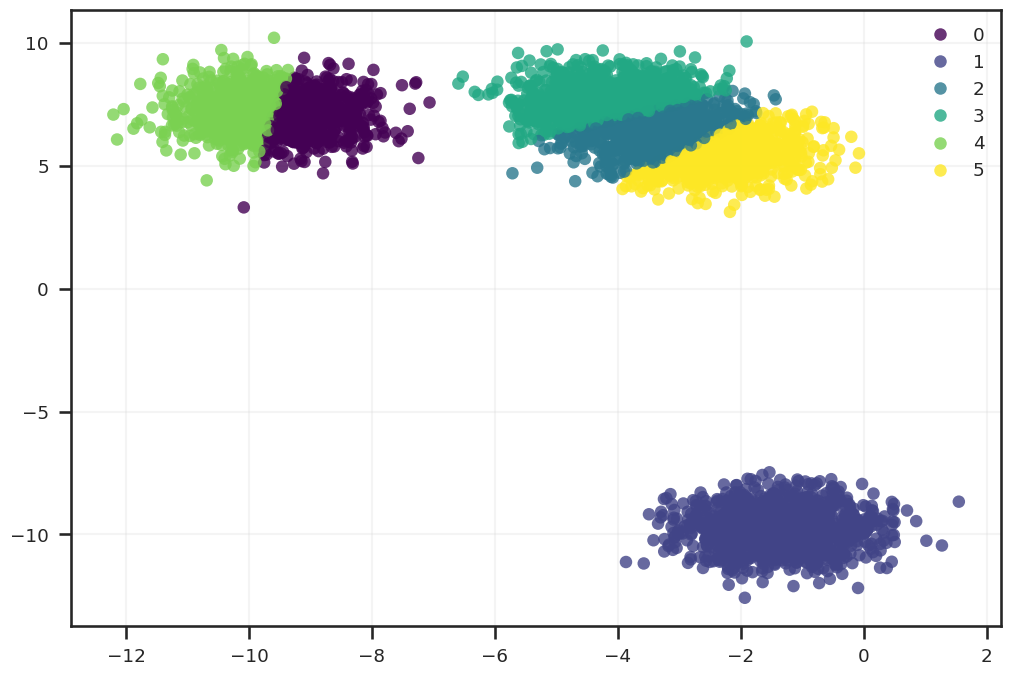

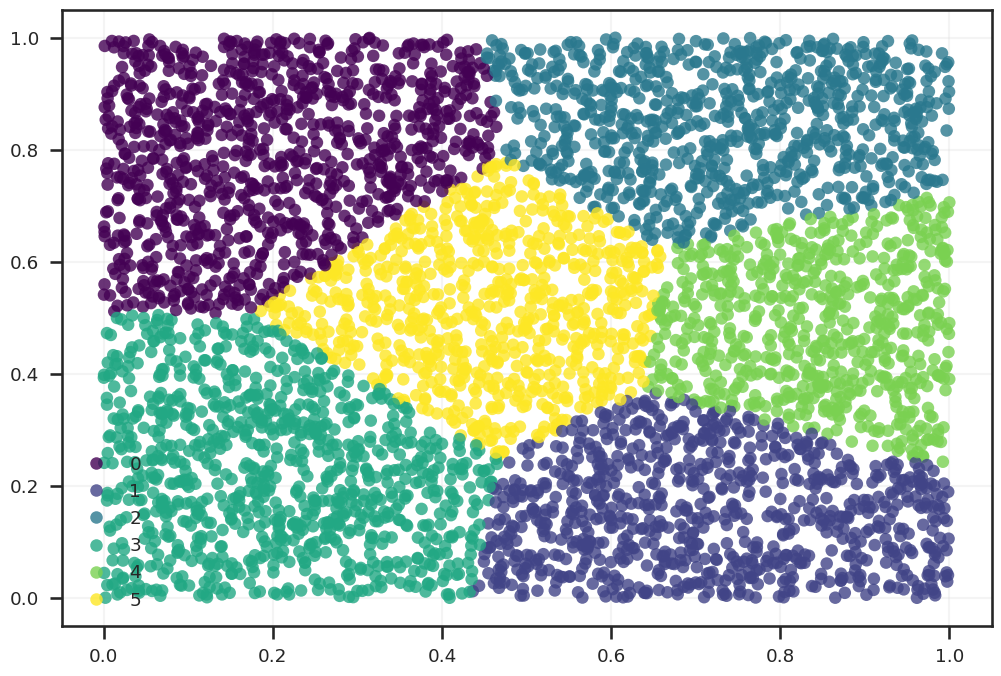

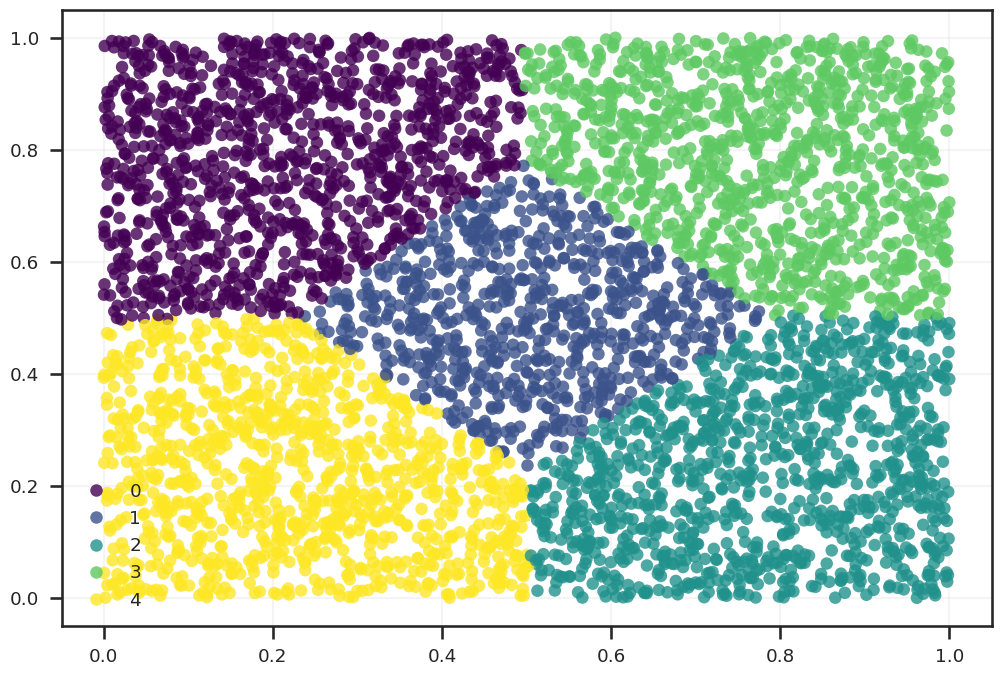

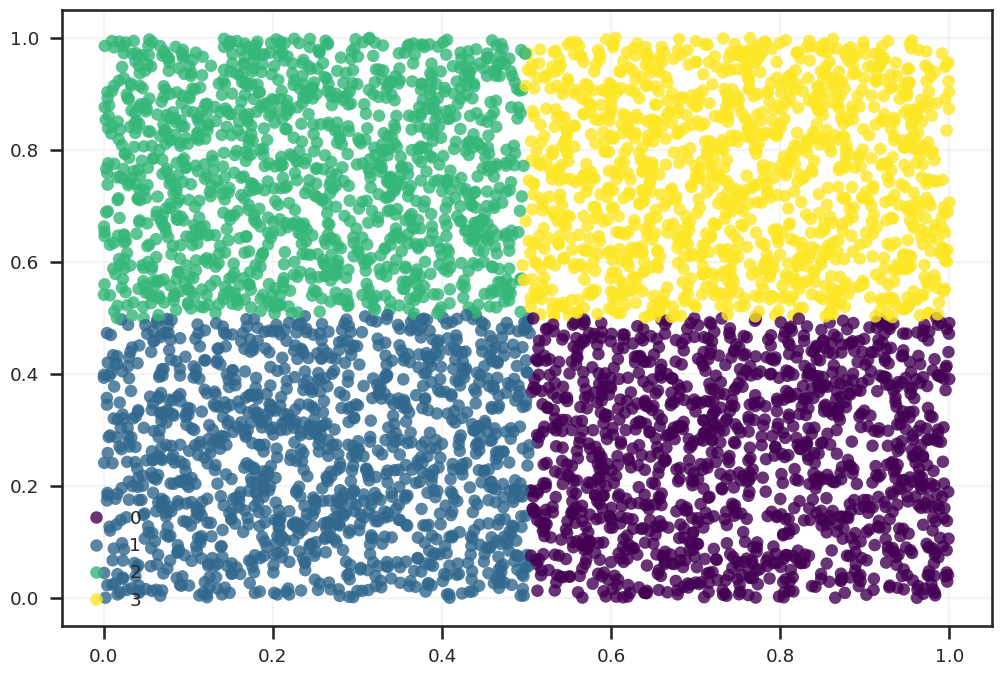

In [75]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)